# Task-1

## Implementation of KNN

In [3]:
class KNN:
    
    def __init__(self,data1,data2,y_label,X1,X2,kValue):
        
        
        
        if(kValue%2!=0):
            
            
            if(kValue<len(y_label)):
                
                
               #Calculating The Euclidean Distance  
        
                l1 = []
                size1 = len(data1)

                for i in range(0,size1):
                    a = 0
                    b = 0
                    c = 0
                    a = data1[i]-X1
                    b = data2[i]-X2
                    a = a*a  #Calculating Square x1
                    b = b*b  #Calculating Square x2
                    c = a+b  # calculating the sum of both squares to get the Euclidean Distance 
                    l1.append(c) # Appending the Euclidean Distance in a list


                l2 = l1.copy()

                l2.sort()



                l3 = [] 

                #Determinng the nearest neighbors based on the K-th minimum distance
                for i in range(0,kValue):
                    l3.append(l2[i])



                #We are finding the indexes of the (k_Values) to find their label

                l4 = []

                for i in range(len(l3)):
                    for j in range(len(l1)):
                        if(l3[i]==l1[j]):
                            l4.append(j)


                #To avoid Duplicates 


                l4 = list(set(l4))


                #Getting the K_labels 

                l5 = []


                for i in l4:
                    l5.append(y_label[i])



                l6 = {"Good": 0,"Bad": 0}

                for i in l5:

                    if(i=='Good'):
                        l6['Good']+=1

                    elif(i=='Bad'):
                        l6['Bad']+=1


                if(l6["Good"]>l6["Bad"]):
                    print("New paper tissue that pass laboratory test with X1 = "
                          ,X1," and X2 =",X2," is included in Good category")

                elif(l6["Good"]==l6["Bad"]):
                    print("New paper tissue that pass laboratory test with X1 = "
                          ,X1," and X2 =",X2," both are in same category")

                else:
                    print("New paper tissue that pass laboratory test with X1 = "
                          ,X1," and X2 =",X2," is included in Bad category")
            else:
                print("The K_value is Greater then the values of Y_Label")
            
            
            
        else:
            print("The Value of K is ",kValue," and it is even value. So, According to KNN algorithm"
                  ,"it should be odd")

data1   = [7,7,3,1]
data2   = [7,4,4,4]
y_label = ['Bad','Bad','Good','Good',]


a  = KNN(data1,data2,y_label,3,7,3)

New paper tissue that pass laboratory test with X1 =  3  and X2 = 7  is included in Good category


# TASK-2

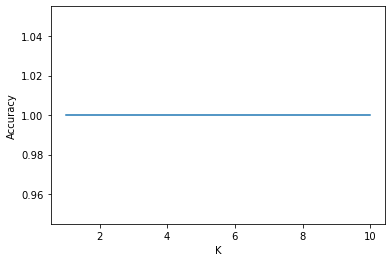

In [5]:
import pandas as pd

#Reading The File 

data = pd.read_csv('fruit_data_with_colors _1_.csv')


#Preparing the data BY eliminating context text and Categorical_Values 

data = data.drop(['fruit_name', 'fruit_subtype'], axis=1)


#Addressing the Missing Value by their means 

data = data.fillna(data.mean())

#Dividing The Data into Testing and training Forms 

X_train = data.iloc[:50, :-1]
y_train = data.iloc[:50, -1]
X_test = data.iloc[50:, :-1]
y_test = data.iloc[50:, -1]



#Applying the KNN algorith 
from sklearn.neighbors import KNeighborsClassifier

y_train = y_train.round().astype(int)
y_test = y_test.round().astype(int)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



#Ploting the Accuracy 

import matplotlib.pyplot as plt

k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()




